In [2]:
import hmf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
def bin_centers(edges):
    centers = list()
    for i in range(len(edges)-1):
        centers.append((edges[i+1]+edges[i])/2)
    return np.array(centers)

In [4]:
halos = np.load("../BAM/hlist_1.00000.npy")

In [5]:
log_hm = np.log10(halos['mvir'])
step = 0.2
bins = np.arange(np.min(log_hm), np.max(log_hm), step=step)

count = scipy.stats.binned_statistic(x=log_hm, values=log_hm, statistic='count', bins=bins)
boxsize = 400

mf = count[0]/step/boxsize**3
x = 10**bin_centers(bins)

### Plot the halo mass function normalised over the simulation volume

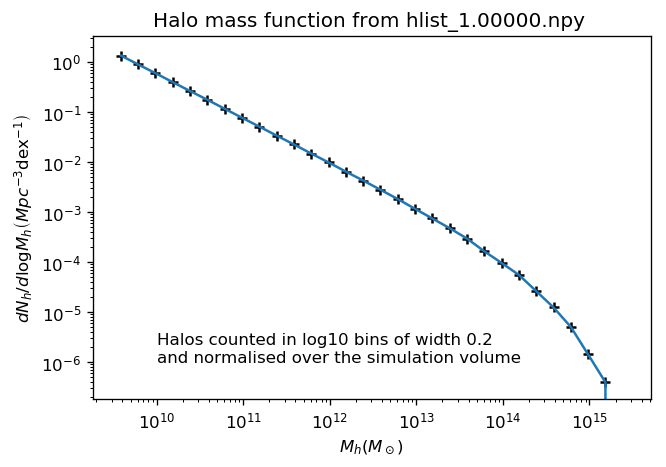

In [21]:
plt.figure(dpi=120)
plt.loglog(x, mf)
plt.scatter(x, mf, c='black', s=30, marker='+')
plt.title('Halo mass function from hlist_1.00000.npy ')
plt.xlabel(r'$M_h\left(M_\odot\right)$')
plt.ylabel(r'$dN_{h}/d\log M_h \left(Mpc^{-3}\mathrm{dex}^{-1} \right)$')
plt.text(10**10, 10**(-6),
         'Halos counted in log10 bins of width 0.2\nand normalised over the simulation volume')
plt.show()